# Tabela Price

**Tabela Price** ou **sistema francês de amortização** é um método usado em amortização de empréstimos em que o valor das prestações (parcelas) é constante.

No sistema da tabela Price o combinado é que se deve pagar uma dívida $\$_0$ em $n$ prestação idênticas de valor $x$ com uma taxa de juros $R_{anual}$ anual. O termo $1 + R_{anual}$ é bastante frequente, por isso lançamos mão da váriavel auxiliar $Z_{anual} = 1 + R_{anual}$. Caso as prestações sejam pagas mensalmente, precisamos de $Z_{mensal}$, dado por $Z_{mensal} = Z_{anual}^{\frac{1}{12}} = (1+R_{anual})^{\frac{1}{12}}$.

Geralmente, o que se sabe é o valor que se quer financiar, $\$_0$; a quantidade $n$ de parcelas e a taxa de juros mensal, $R_{mensal} = R_m \rightarrow Z_m = 1 + R_m$. 

Com essas informações, podemos calcular as seguintes quantidades para cada parcela:

* Prestação:   $x = \frac{(Z_m - 1)Z_m^n}{Z_m^n-1}\$_0$


* Juros: $\$_{juros} = \frac{(Z_m-1)(Z_m^n-Z_m^{k-1})}{(Z_m^n-1)}\$_0$, juros pago na $k-ésima$ parcela


* Amortização: $\$_{amortização} = \frac{(Z_m-1)Z_m^{k-1}}{(Z_m^n-1)}\$_0$


* Dívida: $D_k = \frac{(Z_m^n-Z_m^k)}{(Z_m^n-1)}\$_0$

In [105]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt

pv = 70000       # Valor emprestado ou financiado
anos = 30         # Quantidade de anos
Ra = 0.10         # Taxa de juros a.a
Za = 1 + Ra       

n = 12*anos       # Quantidade de meses
Zm = Za**(1/12)    

In [106]:
# Array com a quantidade de parcelas
N = np.arange(n+1)

# Array com o valor das parcelas, que deve ser constante
x = ((Zm-1)*Zm**n/(Zm**n-1))*pv
X = np.zeros(n+1)
X = X + x
X[0] = 0

# Arrays com o valor da dívida, juros e amortização
divida = np.zeros(n+1)
juros = np.zeros(n+1)
amortizacao = np.zeros(n+1)
for i in range(n):
    k=i+1
    divida[k] = (Zm**n-Zm**k)/(Zm**n-1)*pv
    juros[k] = (Zm-1)*(Zm**n-Zm**(k-1))/(Zm**n-1)*pv
    amortizacao[k] = (Zm-1)*Zm**(k-1) / (Zm**n-1)*pv
divida[0] = pv

In [107]:
# Tabela Price
price = pd.DataFrame()
price['Tempo'] = N
price['Prestação'] = X
price['Juros'] = juros
price['Amortização'] = amortizacao
price['Dívida'] = divida
price.head()

,Tempo,Prestação,Juros,Amortização,Dívida
0,0,0.00,0.00,0.00,70000.00
1,1,592.12,558.19,33.93,69966.07
2,2,592.12,557.92,34.20,69931.86
3,3,592.12,557.65,34.48,69897.38
4,4,592.12,557.37,34.75,69862.63


In [91]:
price.tail()

,Tempo,Prestação,Juros,Amortização,Dívida
356,356,5947.28,336.44,5610.84,23108.40
357,357,5947.28,270.71,5676.57,17431.83
358,358,5947.28,204.21,5743.07,11688.76
359,359,5947.28,136.93,5810.35,5878.42
360,360,5947.28,68.87,5878.42,0.00


## Evolução da dívida na tabela Price

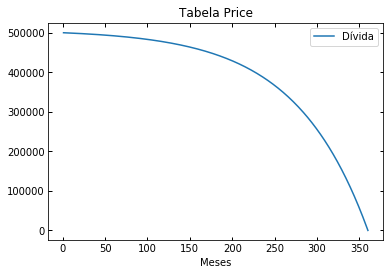

In [92]:
plt.title('Tabela Price')
plt.plot(price['Tempo'][1:], price['Dívida'][1:], label='Dívida')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

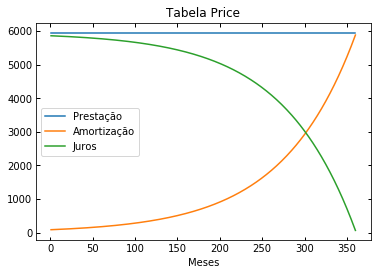

In [93]:
plt.title('Tabela Price')
plt.plot(price['Tempo'][1:], price['Prestação'][1:], label='Prestação')
plt.plot(price['Tempo'][1:], price['Amortização'][1:], label='Amortização')
plt.plot(price['Tempo'][1:], price['Juros'][1:], label='Juros')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

# Tabela SAC

Sistema de Amortização Constante (SAC) é um método usado em amortização de empréstimo em que, diferente do sistema Price, onde a prestação é constante, no SAC, como o próprio nome diz, a amortização da dívida é constante.

No SAC o valor da prestação varia, sendo maior no começo do período e tende ao valor da amortização à medida que o tempo passa.

* Dívida: $D_k = \frac{n-k}{n}\$_0$

* Amortização: $\$_{amortização} = \frac{\$_0}{n}$

* Juros: $\$_{juros} = (Z_m-1)D_{k-1} = (Z_m - 1)(n+1-k)\frac{\$_0}{n}$

* Prestação:   $x = [1+(Z_m-1)(n+1-k)]\frac{\$_0}{n}$

In [94]:
# Array com o valor das amortizações, que deve ser constante
amort = pv/n
amortizacao = np.zeros(n+1)
amortizacao = amortizacao + amort
amortizacao[0] = 0

# Arrays com o valor da dívida, juros e prestação
divida = np.zeros(n+1)
juros = np.zeros(n+1)
X = np.zeros(n+1)
for i in range(n):
    k=i+1
    divida[k] = pv*(n-k)/n
    juros[k] = (Zm-1)*(n+1-k)*pv/n
    X[k] = (1+(Zm-1)*(n+1-k))*pv/n
divida[0] = pv

In [95]:
# Tabela SAC
sac = pd.DataFrame()
sac['Tempo'] = N
sac['Prestação'] = X
sac['Juros'] = juros
sac['Amortização'] = amortizacao
sac['Dívida'] = divida
sac.head()

,Tempo,Prestação,Juros,Amortização,Dívida
0,0,0.00,0.00,0.00,500000.00
1,1,7246.35,5857.46,1388.89,498611.11
2,2,7230.08,5841.19,1388.89,497222.22
3,3,7213.81,5824.92,1388.89,495833.33
4,4,7197.54,5808.65,1388.89,494444.44


In [96]:
sac.tail()

,Tempo,Prestação,Juros,Amortização,Dívida
356,356,1470.24,81.35,1388.89,5555.56
357,357,1453.97,65.08,1388.89,4166.67
358,358,1437.70,48.81,1388.89,2777.78
359,359,1421.43,32.54,1388.89,1388.89
360,360,1405.16,16.27,1388.89,0.00


## Evolução da dívida na tabela SAC

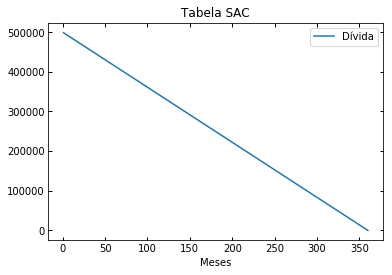

In [97]:
plt.title('Tabela SAC')
plt.plot(sac['Tempo'][1:], sac['Dívida'][1:], label='Dívida')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

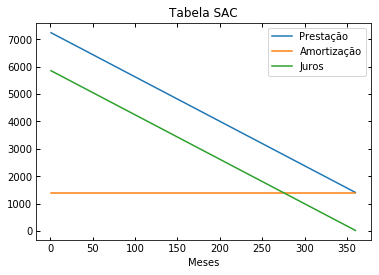

In [98]:
plt.title('Tabela SAC')
plt.plot(sac['Tempo'][1:], sac['Prestação'][1:], label='Prestação')
plt.plot(sac['Tempo'][1:], sac['Amortização'][1:], label='Amortização')
plt.plot(sac['Tempo'][1:], sac['Juros'][1:], label='Juros')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

# Comparando evolução das dívidas no sistema Price e SAC

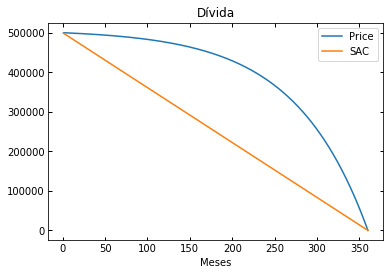

In [99]:
plt.title('Dívida')
plt.plot(price['Tempo'][1:], price['Dívida'][1:], label='Price')
plt.plot(sac['Tempo'][1:], sac['Dívida'][1:], label='SAC')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

# Valor Presente (Present Value)

In [101]:
Ra = 0.20  # Valor da taxa Selic em 07/03/2018
Zm = (1+Ra)**(1/12)

vp_price = price['Prestação'][1]*(Zm**(n)-1)/(Zm**(n)*(Zm-1))

ZZ = [1/Zm**i for i in range(1,361)]
vp_sac = sum(sac['Prestação'][1:]*ZZ)

print('VP (Price): R$ %.0f\nVP (SAC):   R$ %.0f'%(vp_price, vp_sac))

VP (Price): R$ 386834
VP (SAC):   R$ 403814


*O que significam esses números acima? *

*Que tipo de informação eu obtenho sabendo que o Valor Presente, pelo sistema Price é R$ 355,579?*

In [108]:
print("Total pago na tabela SAC:   R$ %.0f" %(sum(sac['Prestação'])))
print("Total pago na tabela Price: R$ %.0f" %(sum(price['Prestação'])))

Total pago na tabela SAC:   R$ 1557271
Total pago na tabela Price: R$ 213164


*Obs: No sistema SAC paga-se menos no total. Isso se deve ao princípio de que o dinheiro no presente vale mais que no futuro. No sistema SAC paga-se parcelas maiores no início do fluxo de pagamento, por isso, menos juros incidem sobre a dívida restante, o que acarreta em um valor total pago menor para o sistema SAC.*

In [109]:
70000*(1+0.065)**30

463005.6314128583

In [131]:
R = 0.003
Z = 1+R
Z = Z**(1/12)
100*(Z-1)

0.024965690741618474

In [125]:
ZZ = [Z**n for n in range(1,361)]

In [126]:
total=592*sum(ZZ)

In [127]:
total

635003.2729153928

In [117]:
592*12

7104